# Project 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

import sklearn.preprocessing as pp
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split

from IPython.display import Image
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
import pydotplus as pdp

from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import  export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
file=pd.read_csv(r'C:\Users\anilv\VS code tutorial PYTHON\Untitled Folder\voice-classification.csv')
df=file
file

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [3]:
file.corr().style.background_gradient(cmap="Blues")

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


## Removing correlated features

In [4]:
file.drop(['centroid'],axis=1,inplace=True)
file.drop(['mode'],axis=1,inplace=True)
file.drop(['Q25'],axis=1,inplace=True)
file.drop(['Q75'],axis=1,inplace=True)
file.drop(['kurt'],axis=1,inplace=True)
file.drop(['sfm'],axis=1,inplace=True)
file.drop(['meanfreq'],axis=1,inplace=True)
file.drop(['meandom'],axis=1,inplace=True)
file.drop(['maxdom'],axis=1,inplace=True)

In [5]:
file.corr().style.background_gradient(cmap="Blues")

,sd,median,IQR,skew,sp.ent,meanfun,minfun,maxfun,mindom,dfrange,modindx
sd,1.000000,-0.562603,0.874660,0.314597,0.716620,-0.466281,-0.345609,-0.129662,-0.357667,-0.475999,0.122660
median,-0.562603,1.000000,-0.477352,-0.257407,-0.502005,0.414909,0.337602,0.251328,0.191169,0.435621,-0.213298
IQR,0.874660,-0.477352,1.000000,0.249497,0.640813,-0.534462,-0.222680,-0.069588,-0.357037,-0.331563,0.041252
skew,0.314597,-0.257407,0.249497,1.000000,-0.195459,-0.167668,-0.216954,-0.080861,-0.061608,-0.304640,-0.169325
sp.ent,0.716620,-0.502005,0.640813,-0.195459,1.000000,-0.513194,-0.305826,-0.120738,-0.294869,-0.319054,0.198074
meanfun,-0.466281,0.414909,-0.534462,-0.167668,-0.513194,1.000000,0.339387,0.311950,0.162163,0.275154,-0.054858
minfun,-0.345609,0.337602,-0.222680,-0.216954,-0.305826,0.339387,1.000000,0.213987,0.082015,0.316486,0.002042
maxfun,-0.129662,0.251328,-0.069588,-0.080861,-0.120738,0.311950,0.213987,1.000000,-0.243426,0.359880,-0.363029
mindom,-0.357667,0.191169,-0.357037,-0.061608,-0.294869,0.162163,0.082015,-0.243426,1.000000,0.008666,0.200212
dfrange,-0.475999,0.435621,-0.331563,-0.304640,-0.319054,0.275154,0.316486,0.359880,0.008666,1.000000,-0.429266


# Data Cleaning

In [6]:
file['label']=file['label'].replace(['male'],1)
file['label']=file['label'].replace(['female'],0)
file

,sd,median,IQR,skew,sp.ent,meanfun,minfun,maxfun,mindom,dfrange,modindx,label
0,0.064241,0.032027,0.075122,12.863462,0.893369,0.084279,0.015702,0.275862,0.007812,0.000000,0.000000,1
1,0.067310,0.040229,0.073252,22.423285,0.892193,0.107937,0.015826,0.250000,0.007812,0.046875,0.052632,1
2,0.083829,0.036718,0.123207,30.757155,0.846389,0.098706,0.015656,0.271186,0.007812,0.007812,0.046512,1
3,0.072111,0.158011,0.111374,1.232831,0.963322,0.088965,0.017798,0.250000,0.007812,0.554688,0.247119,1
4,0.079146,0.124656,0.127325,1.101174,0.971955,0.106398,0.016931,0.266667,0.007812,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.084734,0.153707,0.151859,1.762129,0.962934,0.182790,0.083770,0.262295,0.007812,4.203125,0.161929,0
3164,0.089221,0.076758,0.162193,0.693730,0.960716,0.188980,0.034409,0.275862,0.039062,3.640625,0.277897,0
3165,0.095798,0.183731,0.190936,1.876502,0.946854,0.209918,0.039506,0.275862,0.007812,2.929688,0.194759,0
3166,0.090628,0.184976,0.176435,1.591065,0.950436,0.172375,0.034483,0.250000,0.007812,3.585938,0.311002,0


In [7]:
file.describe()

,sd,median,IQR,skew,sp.ent,meanfun,minfun,maxfun,mindom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.057126,0.185621,0.084309,3.140168,0.895127,0.142807,0.036802,0.258842,0.052647,4.994630,0.173752,0.500000
std,0.016652,0.036360,0.042783,4.240529,0.044980,0.032304,0.019220,0.030077,0.063299,3.520039,0.119454,0.500079
min,0.018363,0.010975,0.014558,0.141735,0.738651,0.055565,0.009775,0.103093,0.004883,0.000000,0.000000,0.000000
25%,0.041954,0.169593,0.042560,1.649569,0.861811,0.116998,0.018223,0.253968,0.007812,2.044922,0.099766,0.000000
50%,0.059155,0.190032,0.094280,2.197101,0.901767,0.140519,0.046110,0.271186,0.023438,4.945312,0.139357,0.500000
75%,0.067020,0.210618,0.114175,2.931694,0.928713,0.169581,0.047904,0.277457,0.070312,6.992188,0.209183,1.000000
max,0.115273,0.261224,0.252225,34.725453,0.981997,0.237636,0.204082,0.279114,0.458984,21.843750,0.932374,1.000000


In [8]:
x=file.iloc[:,:-1]
y=file.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

## Feature Scaling

In [9]:
scaler=pp.StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)

x_test=scaler.transform(x_test)

# Implementing different classifiers

## 1.Logistic Regression

In [10]:
# training the logistic regression model 
alg_logistic_regression = LogisticRegression(C=2, solver = 'liblinear')
alg_logistic_regression.fit(x_train, y_train)

y_p_logistic= alg_logistic_regression.predict(x_test)

# calculating score
train_logistic_score=alg_logistic_regression.score(x_train, y_train)
test_logistic_score=alg_logistic_regression.score(x_test, y_test)
print("score train :",train_logistic_score," score test :",test_logistic_score)

score train : 0.970681100586378  score test : 0.9737118822292324


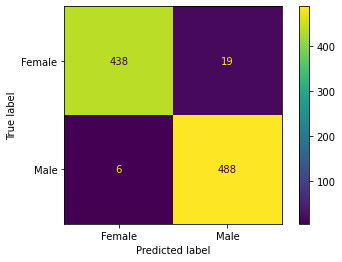

In [11]:
confusion_matrix_1=confusion_matrix(y_test,y_p_logistic)
cm_display_1=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_1,display_labels=['Female', 'Male'])
cm_display_1.plot()
pt.show()

In [12]:
accuracy_logistic=accuracy_score(y_test, y_p_logistic)
precision_logistic=precision_score(y_test, y_p_logistic)
recall_logistic=recall_score(y_test, y_p_logistic)
f1_score_logistic=f1_score(y_test,y_p_logistic)
print("accuracy : ",accuracy_logistic)
print("precision : ",precision_logistic)
print("recall : ",recall_logistic)
print("f1 score : ",f1_score_logistic)

accuracy :  0.9737118822292324
precision :  0.9625246548323472
recall :  0.9878542510121457
f1 score :  0.9750249750249751


## 2.Decision Tree

In [13]:
# training the decision tree model 
alg_decision_tree=DecisionTreeClassifier()
alg_decision_tree.fit(x_train,y_train)

y_p_tree= alg_decision_tree.predict(x_test)

# calculating score
train_tree_score=alg_decision_tree.score(x_train,y_train)
test_tree_score=alg_decision_tree.score(x_test,y_test)
print("score train :",train_tree_score," score test :",test_tree_score)

score train : 1.0  score test : 0.9663512092534174


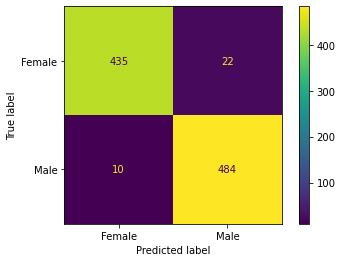

In [14]:
confusion_matrix_2=confusion_matrix(y_test,y_p_tree)
cm_display_2=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_2,display_labels=['Female', 'Male'])
cm_display_2.plot()
pt.show()

In [15]:
accuracy_tree=accuracy_score(y_test, y_p_tree)
precision_tree=precision_score(y_test, y_p_tree)
recall_tree=recall_score(y_test, y_p_tree)
f1_score_tree=f1_score(y_test,y_p_tree)
print("accuracy : ",accuracy_tree)
print("precision : ",precision_tree)
print("recall : ",recall_tree)
print("f1 score : ",f1_score_tree)

accuracy :  0.9663512092534174
precision :  0.9565217391304348
recall :  0.979757085020243
f1 score :  0.9680000000000001


In [16]:
dot_data=export_graphviz(alg_decision_tree,out_file=None)
a=pdp.graph_from_dot_data(dot_data)

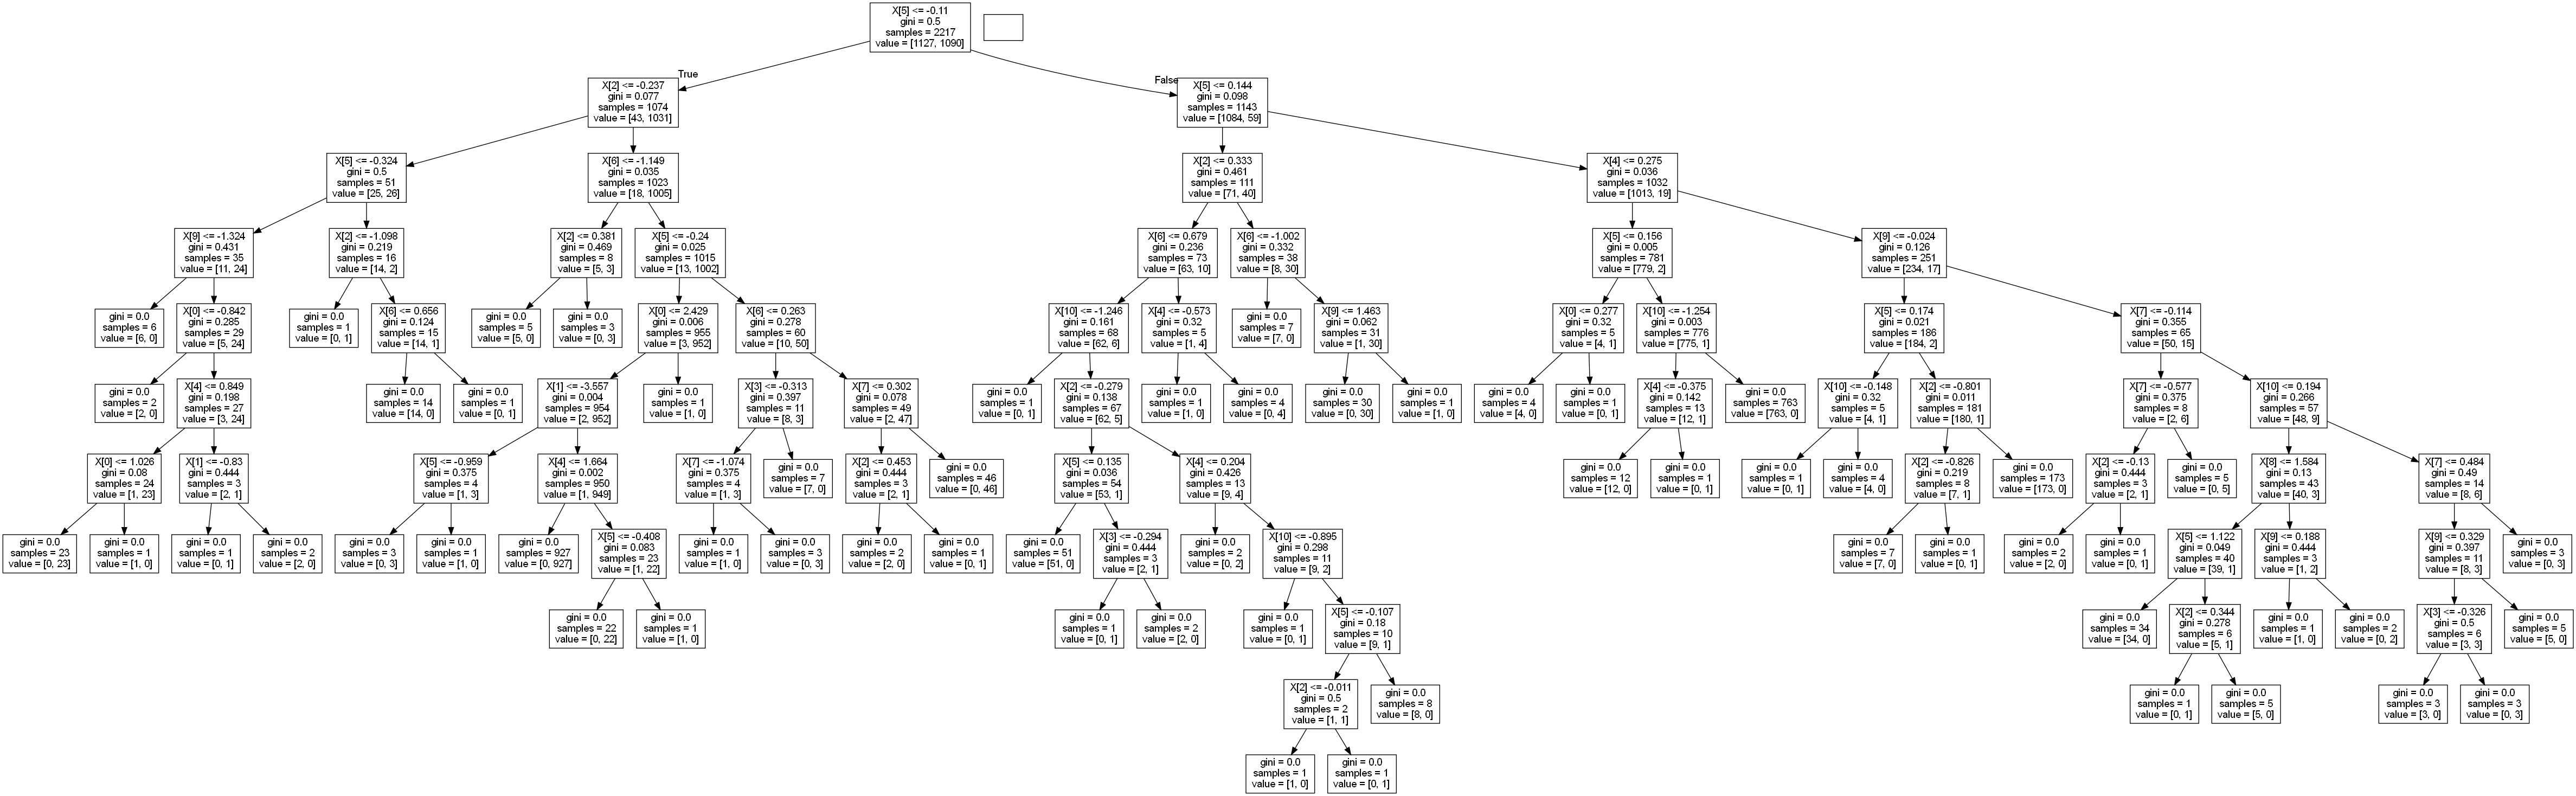

In [17]:
Image(a.create_png())

## 3.Random Forest

In [18]:
# training the random forest model
# n_estimators=1200, n_jobs=-10, random_state = 14
alg_random_forest = RandomForestClassifier()
alg_random_forest.fit(x_train, y_train)

y2_predictions = alg_random_forest.predict(x_test)

train_forest_score=alg_random_forest.score(x_train, y_train)
test_forest_score=alg_random_forest.score(x_test, y_test)
print("score train :",train_forest_score," score test :",test_forest_score)

score train : 1.0  score test : 0.982124079915878


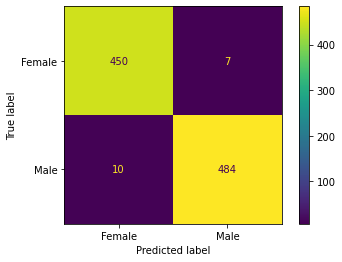

In [19]:
confusion_matrix_3=confusion_matrix(y_test,y2_predictions)
cm_display_3=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_3,display_labels=['Female', 'Male'])
cm_display_3.plot()
pt.show()

In [20]:
accuracy_forest=accuracy_score(y_test, y2_predictions)
precision_forest=precision_score(y_test, y2_predictions)
recall_forest=recall_score(y_test, y2_predictions)
f1_score_forest=f1_score(y_test,y2_predictions)
print("accuracy : ",accuracy_forest)
print("precision : ",precision_forest)
print("recall : ",recall_forest)
print("f1 score : ",f1_score_forest)

accuracy :  0.982124079915878
precision :  0.9857433808553971
recall :  0.979757085020243
f1 score :  0.9827411167512691


## 4.KNN 

In [21]:
# training the random forest model
alg_knn=KNeighborsClassifier()
alg_knn.fit(x_train,y_train)

y_p_knn = alg_knn.predict(x_test)

train_knn_score=alg_knn.score(x_train,y_train)
test_knn_score=alg_knn.score(x_test, y_test)
print("score train :",train_knn_score," score test :",test_knn_score)

score train : 0.9815065403698692  score test : 0.9768664563617245


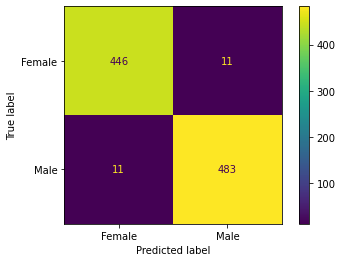

In [22]:
confusion_matrix_4=confusion_matrix(y_test,y_p_knn)
cm_display_4=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_4,display_labels=['Female', 'Male'])
cm_display_4.plot()
pt.show()

In [23]:
accuracy_knn=accuracy_score(y_test, y_p_knn)
precision_knn=precision_score(y_test, y_p_knn)
recall_knn=recall_score(y_test, y_p_knn)
f1_score_knn=f1_score(y_test,y_p_knn)
print("accuracy : ",accuracy_knn)
print("precision : ",precision_knn)
print("recall : ",recall_knn)
print("f1 score : ",f1_score_knn)

accuracy :  0.9768664563617245
precision :  0.9777327935222672
recall :  0.9777327935222672
f1 score :  0.9777327935222672
